# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
log_order = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/log_order.csv')
master_member = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/master_member.csv')
master_product = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/master_product.csv')

# Apply func

In [ ]:
def func(data):
    return data.split(' ')[0]

# log_order

In [ ]:
log_order.columns 
# drop =네이버 포인트, 배송비 정보, 사용한 적립금액, 교환구분, 상품별 추가할인금액, 주문번호, 쿠폰 할인금액, 품목번호,수량
#  결제수단, 공급원가, , 수령인 주소, 주문 시 회원등급, 주문경로, 주문일시, 주문자ID, 판매가, 마진

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [ ]:
log_order['주문경로'].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

In [ ]:
log_order[log_order['수량']==46]#.value_counts()

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호
24512,무통장입금,85250.0,교환안함,0,D-20180620-0000432-00,무료,2018-06-28 오후 6:34,2018-07-02 오전 5:32,0,4963400,...,경기도 여주시 청심로 35-21 (하동),관리자,PC쇼핑몰,20180620-0000432,2018-06-20 오후 4:27,packus,NaN,0,107900,13570


In [ ]:
log_order['주문 시 회원등급'].value_counts()

사업자         15927
일반          15177
전화주문 고객     11860
딜러 유치 회원      463
특별회원          111
관리자            75
딜러             30
VIP             1
Name: 주문 시 회원등급, dtype: int64

In [ ]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [ ]:
# df_log = log_order[['결제수단', '공급원가', '수량','수령인 주소', '주문 시 회원등급',
#            '주문경로', '주문일시', '주문자ID', '판매가', '마진', '주문일시_년', '주문일시_월', '주문일시_일']]
# # df_log['주문경로'].value_counts()
# df_log


# log_order['주문일시'] = pd.to_datetime(log_order['주문일시'])

log_order['주문일시_년'] = log_order['주문일시'].dt.year
log_order['주문일시_월'] = log_order['주문일시'].dt.month
log_order['주문일시_일'] = log_order['주문일시'].dt.day

log_order

In [ ]:
log_order.pivot_table(index='주문경로', columns='주문 시 회원등급',values='판매가', aggfunc='sum')

주문 시 회원등급,VIP,관리자,딜러,딜러 유치 회원,사업자,일반,전화주문 고객,특별회원
주문경로,,,,,,,,
PC쇼핑몰,NaN,3583005.0,2110680.0,16603690.0,421221770.0,325764710.0,677170320.0,2154890.0
모바일웹,0.0,NaN,NaN,12866760.0,489260800.0,549027070.0,1083000.0,4049480.0


In [ ]:
log_order['품목번호'].value_counts()

42602    1
23212    1
23215    1
23216    1
23223    1
        ..
75811    1
75813    1
75815    1
75816    1
3179     1
Name: 품목번호, Length: 46749, dtype: int64

In [ ]:
# log_order = log_order.drop(columns='date')
log_order = log_order.dropna()

# 날짜만 필요하기 때문에 어잔/오후, 시간은 뺀것
log_order['배송완료일'] = log_order['배송완료일'].apply(func)
log_order['배송시작일'] = log_order['배송시작일'].apply(func)
log_order['주문일시'] = log_order['주문일시'].apply(func)

# 판매가에서 공급원가를 빼 마진 확인
log_order['마진'] = log_order['판매가'] - log_order['공급원가']


log_order[['상품명', '상품번호', '수량', '주문경로', '주문번호', '주문일시','주문자ID', '품목번호','공급원가', '판매가', '마진']]
log_order

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,마진
33,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,...,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,현대,0,58410,43319,21010.0
37,카드,49500.0,교환안함,0,D-20190101-0000038-00,무료,2019-01-03,2019-01-07,0,78870,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,78870,43327,29370.0
38,카드,59400.0,교환안함,0,D-20190101-0000038-01,무료,2019-01-03,2019-01-07,0,93720,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,93720,43328,34320.0
39,카드,44550.0,교환안함,0,D-20190101-0000038-02,무료,2019-01-03,2019-01-07,0,71450,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,71450,43329,26900.0
45,카드,69300.0,교환안함,0,D-20190101-0000092-00,무료,2019-01-03,2019-01-07,0,108570,...,일반,모바일웹,20190101-0000092,2019-01-01,yongdduk,NH (농협),0,108570,43344,39270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46714,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,...,일반,PC쇼핑몰,20171227-0000011,2017-12-27,johnnyryuu,국민,0,52800,3117,16500.0
46736,카드,71500.0,교환안함,0,D-20171228-0000126-00,무료,2017-12-29,2018-01-02,0,93000,...,일반,모바일웹,20171228-0000126,2017-12-28,motoleesk,비씨,0,93000,3160,21500.0
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29,2018-01-02,0,52800,...,일반,모바일웹,20171229-0000036,2017-12-29,73987748@n,국민,0,52800,3170,16500.0
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03,2018-01-07,0,112200,...,사업자,모바일웹,20171229-0000043,2017-12-29,chuheesuk,비씨,0,56100,3172,19800.0


In [ ]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '마진'],
      dtype='object')

log_order['마진'].info()

log_order.rename(columns={'마진':'순이익'})

In [ ]:
log_order.to_csv('log_order2.csv')

In [ ]:
#마진이 -값이면 0으로 치환
def func2(data):
    if data < 0:
        return 0
    else:
        return data
    
log_order['마진'] = log_order['마진'].apply(func2)
log_order

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,마진
33,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,...,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,현대,0,58410,43319,21010.0
37,카드,49500.0,교환안함,0,D-20190101-0000038-00,무료,2019-01-03,2019-01-07,0,78870,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,78870,43327,29370.0
38,카드,59400.0,교환안함,0,D-20190101-0000038-01,무료,2019-01-03,2019-01-07,0,93720,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,93720,43328,34320.0
39,카드,44550.0,교환안함,0,D-20190101-0000038-02,무료,2019-01-03,2019-01-07,0,71450,...,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,71450,43329,26900.0
45,카드,69300.0,교환안함,0,D-20190101-0000092-00,무료,2019-01-03,2019-01-07,0,108570,...,일반,모바일웹,20190101-0000092,2019-01-01,yongdduk,NH (농협),0,108570,43344,39270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46714,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,...,일반,PC쇼핑몰,20171227-0000011,2017-12-27,johnnyryuu,국민,0,52800,3117,16500.0
46736,카드,71500.0,교환안함,0,D-20171228-0000126-00,무료,2017-12-29,2018-01-02,0,93000,...,일반,모바일웹,20171228-0000126,2017-12-28,motoleesk,비씨,0,93000,3160,21500.0
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29,2018-01-02,0,52800,...,일반,모바일웹,20171229-0000036,2017-12-29,73987748@n,국민,0,52800,3170,16500.0
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03,2018-01-07,0,112200,...,사업자,모바일웹,20171229-0000043,2017-12-29,chuheesuk,비씨,0,56100,3172,19800.0


In [ ]:
log_order[log_order['판매가'] == 0][['공급원가', '판매가']]

,공급원가,판매가
17558,0.0,0
17565,8800.0,0
17569,4690.0,0
17572,4690.0,0
17589,1600.0,0
...,...,...
46612,1910.0,0
46615,1910.0,0
46648,1910.0,0
46651,1910.0,0


In [ ]:
log_order.pivot_table(index='주문일시' ,columns='주문경로', values='판매가')

주문경로,PC쇼핑몰,모바일웹
주문일시,,
2017-01-15,17000.000000,NaN
2017-01-23,17000.000000,NaN
2017-02-02,72000.000000,NaN
2017-02-06,11700.000000,7115.000000
2017-02-13,NaN,37566.666667
...,...,...
2019-05-27,60673.000000,58719.019608
2019-05-28,50095.294118,63443.888889
2019-05-29,63506.428571,57902.000000


In [ ]:
log_order.isnull().sum()

결제수단          0
공급원가          0
교환구분          0
네이버 포인트       0
배송번호          0
배송비 정보        0
배송시작일         0
배송완료일         0
사용한 적립금액      0
상품구매금액        0
상품명           0
상품번호          0
상품별 추가할인금액    0
수량            0
수령인 주소        0
주문 시 회원등급     0
주문경로          0
주문번호          0
주문일시          0
주문자ID         0
카드사           0
쿠폰 할인금액       0
판매가           0
품목번호          0
마진            0
dtype: int64

In [ ]:
log_order['date'] = log_order['주문일시'].apply(func)
log_order.pivot_table(index='date', values='판매가', aggfunc='sum').reset_index()

,date,판매가
0,2017-01-15,17000
1,2017-01-23,17000
2,2017-02-02,72000
3,2017-02-06,25930
4,2017-02-13,112700
...,...,...
690,2019-05-27,4814860
691,2019-05-28,3135600
692,2019-05-29,2047130
693,2019-05-30,2315440


# master_member

In [ ]:
master_member.columns

# drop = 
#  ID, 나이, 성별, 주소(동/읍/면), 유입경로, 유입기기, 사업자구분, 회원구분, '최종접속일', '최종주문일'

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [ ]:
master_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [ ]:
master_member[['ID', '나이', '성별', '주소(동/읍/면)', '유입경로', '유입기기', '사업자구분',
               '회원구분', '최종접속일', '최종주문일']].isnull().sum()

ID              0
나이              0
성별              0
주소(동/읍/면)     634
유입경로            0
유입기기            0
사업자구분           0
회원구분            0
최종접속일          52
최종주문일        1422
dtype: int64

In [ ]:
master_member.isnull().sum()

ID              0
나이              0
사용가능 적립금        0
성별              0
주소(동/읍/면)     634
최종접속일          52
최종주문일        1422
유입경로            0
유입기기            0
회원 가입일          0
사업자구분           0
회원구분            0
dtype: int64

In [ ]:
df_merge = pd.merge(log_order, master_member, left_on='주문자ID', right_on='ID', how='inner')
df_merge

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,...,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
1,카드,44000.0,교환안함,0,D-20190103-0000113-00,무료,2019-01-03,2019-01-07,0,141240,...,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
2,"쿠폰,카드",74250.0,교환안함,0,D-20190108-0000743-00,무료,2019-01-10,2019-01-14,0,116000,...,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
3,"쿠폰,카드",37400.0,교환안함,0,D-20190115-0000586-00,무료,2019-01-16,2019-01-20,0,175230,...,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
4,"쿠폰,카드",44000.0,교환안함,0,D-20190127-0000199-00,무료,2019-01-29,2019-02-02,0,141240,...,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,카드,2000.0,교환안함,0,D-20171226-0000213-04,무료,2017-12-27,2017-12-31,0,7600,...,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14443,카드,1350.0,교환안함,0,D-20171226-0000213-05,무료,2017-12-27,2017-12-31,0,5500,...,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14444,카드,47850.0,교환안함,0,D-20171226-0000213-06,무료,2017-12-27,2017-12-31,0,107800,...,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14445,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,...,0,여자,서울특별시 성동구 살곶이4길 10 (행당동),2018-02-01 오후 4:01,2017-12-27 오전 2:42,블로그광고,PC,2017-12-27,개인,일반


In [ ]:
df_merge.isnull().sum()
df_merge2 = df_merge.drop(columns='카드사')
df_merge2 = df_merge2.dropna()
df_merge2.isnull().sum()
# df_merge2['상품번호'], product['상품코드']

df_merge3 = pd.merge(df_merge2, master_product, left_on='상품번호', right_on='상품코드', how = 'inner')
df_merge3.to_csv('result.csv')

In [ ]:
master_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [ ]:
df_merge['상품번호'] = df_merge['상품번호'].dropna(how='all')
df_merge['상품번호'].isnull().sum()
# df_merge['상품번호'].isnull()
# df_merge['상품번호'] = df_merge['상품번호'].astype(int)

0

In [ ]:
master_member['최종주문일_'] = master_member['최종주문일'].dropna()
master_member['최종주문일_'].dropna()#.isnull().sum()

1        2017-01-01 오후 3:38
2       2017-02-26 오후 10:55
4        2018-12-19 오후 1:29
5        2017-01-18 오후 4:41
6        2017-02-13 오후 3:12
               ...         
6567    2019-05-31 오전 10:07
6568     2019-05-31 오후 4:58
6569     2019-05-31 오후 3:17
6570     2019-05-31 오후 4:30
6573    2019-06-19 오전 11:18
Name: 최종주문일_, Length: 5153, dtype: object

In [ ]:
# def func1(data):
#     if '오전' in data:
#         return data
#     elif '오후' in data
#     return data
    
def func1(data):    
    return data

master_member['최종주문일_'].dropna().apply(func1)

1        2017-01-01 오후 3:38
2       2017-02-26 오후 10:55
4        2018-12-19 오후 1:29
5        2017-01-18 오후 4:41
6        2017-02-13 오후 3:12
               ...         
6567    2019-05-31 오전 10:07
6568     2019-05-31 오후 4:58
6569     2019-05-31 오후 3:17
6570     2019-05-31 오후 4:30
6573    2019-06-19 오전 11:18
Name: 최종주문일_, Length: 5153, dtype: object

In [ ]:
master_member['최종주문일'].isnull().sum()

1422

In [ ]:
master_member[['최종접속일', '최종주문일','회원 가입일']] # .isnull().sum()

,최종접속일,최종주문일,회원 가입일
0,2016-12-30 오후 5:57,NaN,2016-12-30
1,2017-01-02 오후 12:32,2017-01-01 오후 3:38,2017-01-01
2,2017-02-26 오후 10:52,2017-02-26 오후 10:55,2017-01-14
3,2017-01-23 오후 6:25,NaN,2017-01-17
4,2018-12-19 오후 1:26,2018-12-19 오후 1:29,2017-01-17
...,...,...,...
6570,2019-05-31 오후 4:38,2019-05-31 오후 4:30,2019-05-31
6571,2019-06-21 오후 9:38,NaN,2019-06-05
6572,2019-06-12 오후 7:59,NaN,2019-06-12
6573,2019-06-19 오전 10:59,2019-06-19 오전 11:18,2019-06-19


# master_product

In [ ]:
# master_product = pd.read_csv('master_product.csv')#.value_counts()
# master_product.isnull().sum()
# drop : 상품코드

In [ ]:
df = pd.merge(master_member,log_order, how='inner', left_on = 'ID', right_on='주문자ID')
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종주문일_', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '마진', 'date'],
      dtype='object')

In [ ]:
df['주소'] = df['주소(동/읍/면)'].fillna(0)
df['주소']

0        전라북도 전주시 완산구 효자동3가 1676-13
1        전라북도 전주시 완산구 효자동3가 1676-13
2        전라북도 전주시 완산구 효자동3가 1676-13
3            광주광역시 서구 화운로 152 (화정동)
4            광주광역시 서구 화운로 152 (화정동)
                    ...            
14442                 서울특별시 용산구 후암동
14443                             0
14444                             0
14445                             0
14446                             0
Name: 주소, Length: 14447, dtype: object

In [ ]:
df['주소'] = df['주소(동/읍/면)'].fillna(0)
df['주소']

for i in df['주소']:
    if i == 0 :
         df['주소'] = df['수령인 주소']
    else:
        continue

In [ ]:
import seaborn as sns

def func3(data):
    return data.split('(')[0].split(' ')[0]

df['주소'].apply(func3)


0         전라북도
1         전라북도
2         전라북도
3        광주광역시
4        광주광역시
         ...  
14442    서울특별시
14443     전라북도
14444     충청남도
14445     충청남도
14446    대전광역시
Name: 주소, Length: 14447, dtype: object

# Merge

- df_merge = pd.merge(log_order, master_member, left_on='주문자ID', right_on='ID', how='inner')
- df_merge2 = df_merge.drop(columns='카드사')
- df_merge3 = pd.merge(df_merge2, master_product, left_on='상품번호', right_on='상품코드', how = 'inner')

In [ ]:
df_merge3.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '쿠폰 할인금액', '판매가_x',
       '품목번호', '마진', 'date', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)',
       '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '#', '공급사',
       '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리',
       '판매가_y', '품절여부', '후기'],
      dtype='object')

In [ ]:
df_merge3['주문일시']

0        2019-01-01
1        2019-01-15
2        2019-01-27
3        2019-02-13
4        2019-02-27
            ...    
10296    2018-09-06
10297    2018-09-10
10298    2018-10-03
10299    2017-07-06
10300    2017-12-07
Name: 주문일시, Length: 10301, dtype: object

In [ ]:
def func(data):
    return data.split(' ')[0]

df_merge3['주문일시_dt'] = pd.to_datetime(df_merge3['주문일시'].apply(func)).drop(columns='주문일시')

In [ ]:
df_merge3[['판매가_x', '판매가_y']]

count = 0
for i in range(len(df_merge3)):
    if df_merge3['판매가_x'][i] == df_merge3['판매가_y'][i] :
        count += 1

In [ ]:
df_merge3

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가_y,품절여부,후기,주문일시_dt
0,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,...,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-01
1,"쿠폰,카드",37400.0,교환안함,0,D-20190115-0000586-00,무료,2019-01-16,2019-01-20,0,175230,...,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-15
2,"쿠폰,카드",37400.0,교환안함,0,D-20190127-0000199-01,무료,2019-01-29,2019-02-02,0,116820,...,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-27
3,"쿠폰,카드",37400.0,교환안함,0,D-20190213-0000022-01,무료,2019-02-13,2019-02-17,0,149100,...,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-02-13
4,"쿠폰,카드",37400.0,교환안함,0,D-20190227-0000079-00,무료,2019-02-27,2019-03-03,0,99400,...,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,카드,63800.0,교환안함,0,D-20180906-0000189-00,무료,2018-09-07,2018-09-11,0,101810,...,63800,"105파이 다용도컵 세트 5호 소 250ml 투명 PS 1,000개 1set(2박스)",50,사용함,자체제작,038 : 한식(분식) 용기\n038002 : 한식(분식) 용기 > 소스/국/밥용기...,85320,정상,6,2018-09-06
10297,카드,39820.0,교환안함,0,D-20180910-0000296-00,무료,2018-09-12,2018-09-16,0,152940,...,39820,업소용도마 특1호,417,사용함,자체제작,046 : 주방용품/소모품\n061 : vol.4 Catalogue\n061013 ...,40000,정상,2,2018-09-10
10298,카드,85140.0,교환안함,0,D-20181003-0000382-03,무료,2018-10-05,2018-10-09,0,132330,...,85140,반찬용기 212-3 3칸 투명 600개 1set(2박스),1213,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,113830,정상,0,2018-10-03
10299,카드,32120.0,교환안함,0,D-20170706-0000013-00,무료,2017-07-10,2017-07-10,0,43000,...,32120,130 실링필름 Hold 130mm x 200 meter 투명 무지 4롤 1박스,246,사용함,자체제작,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,41580,정상,0,2017-07-06


In [ ]:
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종주문일_', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '마진', 'date',
       '주소'],
      dtype='object')

In [ ]:
# product와 member를 merge한 df에서 필요한 column을 추출해 주문 시 회원등급별 판매가를 확인

df_col = df[[
    'ID', '나이','성별', '주소', '최종주문일', '유입경로', '유입기기', '회원 가입일', '최종주문일_', '결제수단',
'배송시작일', '배송완료일', '수량', '주문 시 회원등급', '주문경로','주문일시','판매가','공급원가', '마진' ]]
# '주문일시_년','주문일시_월', '주문일시_일'
df_col.pivot_table(index='주문 시 회원등급', values=['판매가','마진'], aggfunc='sum').reset_index()

,주문 시 회원등급,마진,판매가
0,딜러,753280.0,2110680
1,딜러 유치 회원,1535800.0,4901800
2,사업자,114234025.0,356144020
3,일반,149519620.0,460978750
4,전화주문 고객,562970.0,1645260
5,특별회원,385590.0,1324720


In [ ]:
df_col['배송시작일'] = pd.to_datetime(df_col['배송시작일'])
df_col['배송완료일'] = pd.to_datetime(df_col['배송완료일'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_col['배송시간'] = df_col['배송완료일'] - df_col['배송시작일']
df_col['배송시간']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0 days
1       1 days
2       2 days
3       4 days
4       4 days
         ...  
14442   4 days
14443   4 days
14444   4 days
14445   4 days
14446   4 days
Name: 배송시간, Length: 14447, dtype: timedelta64[ns]

In [ ]:
df_col.columns

Index(['ID', '나이', '성별', '주소', '최종주문일', '유입경로', '유입기기', '회원 가입일', '최종주문일_',
       '결제수단', '배송시작일', '배송완료일', '수량', '주문 시 회원등급', '주문경로', '주문일시', '판매가',
       '공급원가', '마진', '배송시간'],
      dtype='object')

In [ ]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
# df_col.pivot_table(index=['ID', '주문 시 회원등급'],values = '판매가', aggfunc='sum').reset_index().sort_values(by='판매가', ascending=False)

In [ ]:
def func5(data):
    return str(data).split(' ')[0] + str(data).split(' ')[1]


def func4(data):
    return data.split(' ')[0] +' '+ data.split(' ')[1]


df_col['시주소'] = df_col['주소'].apply(func4)

df_col.pivot_table(index='시주소', values='배송시간', aggfunc='mean').reset_index().sort_values(by='배송시간', ascending=False)['배송시간'].apply(func5).value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


4days    200
3days     12
8days      1
6days      1
Name: 배송시간, dtype: int64

In [ ]:
import pandas as pd

import folium 
from folium import plugins

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

In [ ]:
geo_data = 'C:/Users/DMC CONET/Downloads/korea_20210401.geojson'
geo_data

'C:/Users/DMC CONET/Downloads/korea_20210401.geojson'

In [ ]:
df_col['주문일시'] = pd.to_datetime(df_col['주문일시'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_col['주문일시'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   14447
unique                    695
top       2018-12-26 00:00:00
freq                       96
first     2017-01-15 00:00:00
last      2019-05-31 00:00:00
Name: 주문일시, dtype: object

In [ ]:
df_col.sort_values(by='주문일시')['주문일시']

0       2017-01-15
1       2017-01-23
7       2017-02-02
8       2017-02-06
10      2017-02-06
           ...    
12309   2019-05-31
14445   2019-05-31
9620    2019-05-31
5271    2019-05-31
14446   2019-05-31
Name: 주문일시, Length: 14447, dtype: datetime64[ns]

In [ ]:
df_col

,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시


In [ ]:
# 주문일시를 년, 월, 일로 변환
df_col["년"] =df_col["주문일시"].dt.year
df_col["월"] =df_col["주문일시"].dt.month
df_col["일"] =df_col["주문일시"].dt.day

df_col["week"] =df_col["주문일시"].dt.week
df_col["day_of_week"] =df_col["주문일시"].dt.day_name()

df_col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소,년,월,일,week,day_of_week
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시,2017,1,15,2,Sunday
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시,2017,1,23,4,Monday
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시,2017,2,26,8,Sunday
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구,2018,4,16,16,Monday
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구,2018,4,16,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구,2019,5,29,22,Wednesday
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시,2019,5,31,22,Friday
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시,2019,5,31,22,Friday
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시,2019,5,31,22,Friday


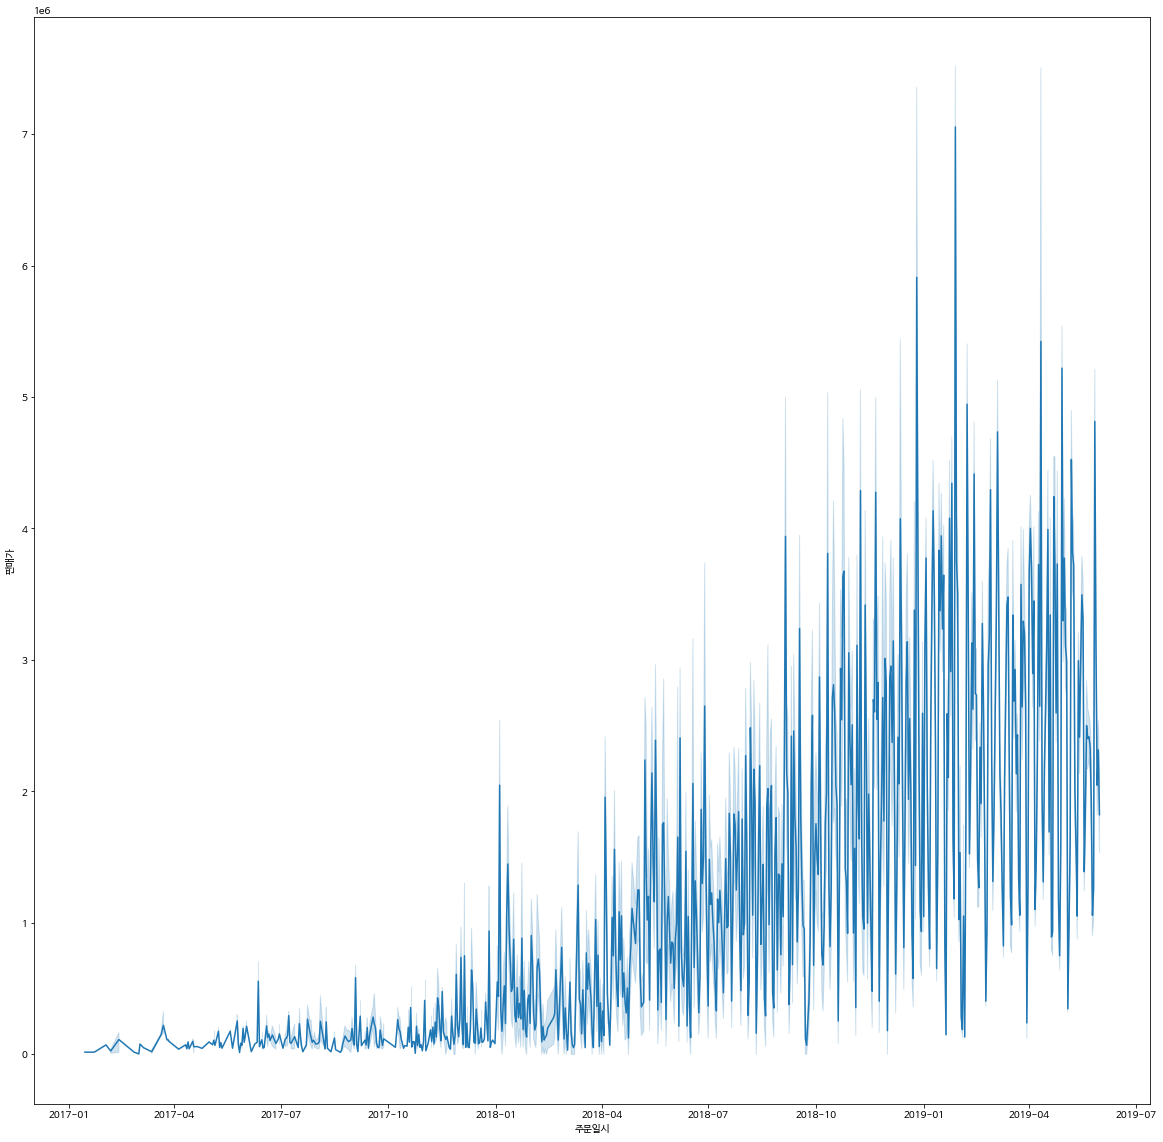

In [ ]:
#판매가에 대한 그래프 시각화

plt.figure(figsize=(20, 20))
sns.lineplot(data=df_col, x="주문일시", y="판매가", estimator=sum)

In [ ]:
# 주문일시에 대한 판매가의 합
p1 = df_col.pivot_table(index='주문일시', values='판매가', aggfunc='sum').reset_index()
# sns.lineplot(data=p1, x="주문일시", y="판매가")

In [ ]:
df_col

,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소,년,월,일,week,day_of_week
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시,2017,1,15,2,Sunday
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시,2017,1,23,4,Monday
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시,2017,2,26,8,Sunday
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구,2018,4,16,16,Monday
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구,2018,4,16,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구,2019,5,29,22,Wednesday
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시,2019,5,31,22,Friday
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시,2019,5,31,22,Friday
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시,2019,5,31,22,Friday


In [ ]:
p2 = df_col.pivot_table(index=['주문일시', '유입기기'], values='판매가', aggfunc='sum').reset_index()
p2

,주문일시,유입기기,판매가
0,2017-01-15,PC,17000
1,2017-01-23,PC,17000
2,2017-02-02,PC,72000
3,2017-02-06,PC,11700
4,2017-02-06,모바일,14230
...,...,...,...
1194,2019-05-29,모바일,935770
1195,2019-05-30,PC,659960
1196,2019-05-30,모바일,1655480
1197,2019-05-31,PC,685100


In [ ]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '마진', 'date'],
      dtype='object')

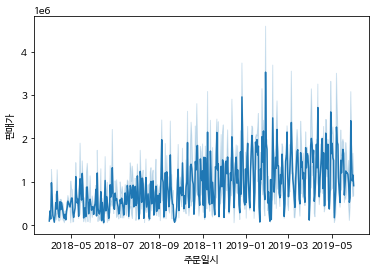

In [ ]:
sns.lineplot(data=p2[380:], x='주문일시', y='판매가')
# sns.lineplot(data=p2, x='주문일시', y='판매가', hue='유입기기')

In [ ]:
p2.iloc[380]

주문일시    2018-04-01 00:00:00
유입기기                     PC
판매가                   97500
Name: 380, dtype: object

In [ ]:
# target 값도 380번째부터 조지면 조져진다.

In [ ]:
# 여기로

In [ ]:
# 식자재, 한식(분식), 주방용품/소모품

In [ ]:
master_product.columns

Index(['#', '공급사', '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사',
       '카테고리', '판매가', '품절여부', '후기'],
      dtype='object')

In [ ]:
master_product['카테고리'].value_counts()

046 : 주방용품/소모품\n046007 : 주방용품/소모품 > 주방용품\n046007006 : 주방용품/소모품 > 주방용품 > 양념통세트                                                                                                                                                                                                                                                   57
050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005002 : 식자재 > 카페 식재료 > 시럽류\n026 : NEW\n026010 : NEW > 식자재\n026010007 : NEW > 식자재 > 카페 식재료\n026010007002 : NEW > 식자재 > 카페 식재료 > 시럽류                                                                                                                                                        39
043 : 베이커리/카페 용기\n043004 : 베이커리/카페 용기 > 생수/쥬스/더치커피용기                                                                                                                                                                                                                                                                            33
042 : 실링제품\n042001 : 실링제품 > 실링용

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_station/project/data2.csv')
df

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,쿠폰 할인금액,판매가_x,품목번호,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가_y,품절여부,후기,카테고리1
0,0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0.0,71450.0,195파이 탕용기 소 300개 1set(2박스),1077.0,13600.0,1.0,경상남도 거제시 능포로 168-1 (능포동),전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,0.0,71450.0,42602.0,pp683,32.0,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,패커스,과세,129.0,44550.0,195파이 탕용기 소 300개 1set(2박스),1077.0,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,57850.0,정상,80.0,한식(분식)
1,1,무통장입금,44550.0,교환안함,0.0,D-20190520-0000625-01,무료,2019-05-22 오전 9:11,2019-05-26 오전 5:32,0.0,57850.0,195파이 탕용기 소 300개 1set(2박스),1077.0,0.0,1.0,경상남도 거제시 능포로 168-1 (능포동),전화주문 고객,PC쇼핑몰,20190520-0000625,2019-05-20 오후 1:52,pp683,0.0,57850.0,77056.0,pp683,32.0,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,패커스,과세,129.0,44550.0,195파이 탕용기 소 300개 1set(2박스),1077.0,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,57850.0,정상,80.0,한식(분식)
2,2,무통장입금,44550.0,교환안함,0.0,D-20181231-0000373-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0.0,71450.0,195파이 탕용기 소 300개 1set(2박스),1077.0,13600.0,1.0,경상북도 봉화군 석포면 석포로 166,전화주문 고객,PC쇼핑몰,20181231-0000373,2018-12-31 오후 2:02,pp024,0.0,71450.0,43165.0,pp024,67.0,0.0,남자,경상북도 봉화군 석포면 석포로 166,2019-05-28 오후 4:00,2019-05-28 오후 4:01,인터넷기사광고,PC,2018-01-29,개인,전화주문 고객,패커스,과세,129.0,44550.0,195파이 탕용기 소 300개 1set(2박스),1077.0,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,57850.0,정상,80.0,한식(분식)
3,3,무통장입금,44550.0,교환안함,0.0,D-20190402-0000561-01,무료,2019-04-03 오전 9:09,2019-04-07 오전 5:32,0.0,57850.0,195파이 탕용기 소 300개 1set(2박스),1077.0,0.0,1.0,경상북도 봉화군 석포면 석포로 166,전화주문 고객,PC쇼핑몰,20190402-0000561,2019-04-02 오후 2:02,pp024,0.0,57850.0,65152.0,pp024,67.0,0.0,남자,경상북도 봉화군 석포면 석포로 166,2019-05-28 오후 4:00,2019-05-28 오후 4:01,인터넷기사광고,PC,2018-01-29,개인,전화주문 고객,패커스,과세,129.0,44550.0,195파이 탕용기 소 300개 1set(2박스),1077.0,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,57850.0,정상,80.0,한식(분식)
4,4,무통장입금,44550.0,교환안함,0.0,D-20190528-0000798-00,무료,2019-05-30 오후 6:42,2019-06-03 오전 5:32,0.0,57850.0,195파이 탕용기 소 300개 1set(2박스),1077.0,0.0,1.0,경상북도 봉화군 석포면 석포로 166,전화주문 고객,PC쇼핑몰,20190528-0000798,2019-05-28 오후 4:01,pp024,0.0,57850.0,79019.0,pp024,67.0,0.0,남자,경상북도 봉화군 석포면 석포로 166,2019-05-28 오후 4:00,2019-05-28 오후 4:01,인터넷기사광고,PC,2018-01-29,개인,전화주문 고객,패커스,과세,129.0,44550.0,195파이 탕용기 소 300개 1set(2박스),1077.0,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,57850.0,정상,80.0,한식(분식)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,43117,무통장입금,63800.0,교환안함,0.0,D-20171121-0000123-00,무료,2017-11-22 오후 5:32,2017-11-26 오전 5:38,0.0,91300.0,"105파이 다용도컵 세트 5호 소 250ml 투명 PS 1,000개 1set(2박스)",50.0,11870.0,1.0,경기도 수원시 팔달구 화서동,사업자,모바일웹,20171121-0000123,2017-11-21 오후 4:09,ljh08016,0.0,91300.0,2387.0,ljh08016,41.0,0.0,남자,경기도 수원시 팔달구 화서동,2018-06-28 오후 2:26,2017-11-21 오후 4:09,기타,모바일,2017-10-29,사업자,사업자,패커스,과세,0.0,63800.0,"105파이 다용도컵 세트 5호 소 250ml 투명 PS 1,000개 1set(2박스)",50.0,사용함,자체제작,038 : 한식(분식) 용기\n038002 : 한식(분식) 용기 > 소스/국/밥용기...,85320.0,정상,6.0,한식(분식)
30439,43121,무통장입금,154000.0,교환안함,0.0,D-20180928-0000609-00,무료,2018-10-05 오전 9:14,2018-10-09 오전 5:32,0.0,235620.0,반찬용기 D-857 4칸 투명 400개 1set(2박스),1192.0,35300.0,1.0,서울특별시 영등포구 도림로141다길 30 (문래동4가),일반,PC쇼핑몰,20180928-0000609,2018-09-28 오후 5:42,42078672@n,0.0,235620.0,26349.0,42078672@n,48.0,5000.0,남자,서울특별시 영등포구 도림로141다길 30 (문래동4가),2018-09-28 오후 5:01,2018-09-28 오후 5:42,블로그광고,PC,2018-09-28,개인,일반,패커스,과세,1.0,154000.0,반찬용기 D-857 4칸 투명 400개 1set(2박스),1192.0,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,200320.0,정상,0.0,한식(분

In [ ]:
def func(data):
    return data.split()[0]

df['datetime'] = pd.to_datetime(df['최종주문일'].apply(func))
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [ ]:
df['순이익'] = (df['판매가_y'] - df['공급원가']) * df['수량']
df.pivot_table(index=['year','month'], values='순이익', aggfunc='sum')

순이익
year month             
2017 1          32340.0
     2         147400.0
     3         115090.0
     4         103300.0
     5         235860.0
     6         396470.0
     7         463130.0
     8         373780.0
     9         381680.0
     10        624680.0
     11       1245220.0
     12       1660370.0
2018 1        2743990.0
     2        1888010.0
     3        3191310.0
     4        4036910.0
     5        6802470.0
     6        3813150.0
     7        5503090.0
     8        7228690.0
     9        6655680.0
     10      12866320.0
     11      11129910.0
     12      14727330.0
2019 1       20522780.0
     2       21907560.0
     3       31720040.0
     4       60333240.0
     5      337444740.0
     6        1587360.0

In [ ]:
df.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '쿠폰 할인금액',
       '판매가_x', '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일',
       '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '공급사', '과세/면세',
       '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부',
       '후기', '카테고리1', 'datetime', 'year', 'month', 'day', '순이익'],
      dtype='object')

In [ ]:
# 상품명을 space 단위로 split
def func(data):
    return data.split()

df['상품명'].apply(func)


0                         [195파이, 탕용기, 소, 300개, 1set(2박스)]
1                         [195파이, 탕용기, 소, 300개, 1set(2박스)]
2                         [195파이, 탕용기, 소, 300개, 1set(2박스)]
3                         [195파이, 탕용기, 소, 300개, 1set(2박스)]
4                         [195파이, 탕용기, 소, 300개, 1set(2박스)]
                               ...                        
30438    [105파이, 다용도컵, 세트, 5호, 소, 250ml, 투명, PS, 1,000개...
30439               [반찬용기, D-857, 4칸, 투명, 400개, 1set(2박스)]
30440               [반찬용기, 212-2, 2칸, 투명, 600개, 1set(2박스)]
30441                               [다회용, 피크닉세트, 4인용(28P)]
30442                               [다회용, 피크닉세트, 4인용(28P)]
Name: 상품명, Length: 30443, dtype: object

In [ ]:
# (판매가 - 원가) * 수량 = 순이익
# datetime 순이익  = 시계열 예측?
# 제목처럼 매출을 예측 
# 카테고리범주를 3가지나눠서 시계열로 예측한다음, 그 그래프를 가지고 ppt 넣고
# 20,30 유입에관한 정보  30분

count = 0
for i in range(len(df)): #df == 10000
    if df['판매가_x'][i] == df['판매가_y'][i]:
        count += 1
print(count, df['판매가_x'].sum(), df['판매가_y'].sum())

9453 2165256590.0 1926747670.0


In [ ]:
df['year'].value_counts()

2019    25300
2018     4756
2017      387
Name: year, dtype: int64

In [ ]:
# 카테고리별 판매가 분석을하기위해 컨디션을 줌
cond1 = (df['카테고리1'] == '한식(분식)')
cond2 = (df['카테고리1'] == '중식')
cond3 = (df['카테고리1'] == '주방용품/소모품')

df.loc[cond1].pivot_table(index=['year','month'], values='판매가_y', aggfunc='sum')

판매가_y
year month             
2017 2         442120.0
     3         461170.0
     4         337380.0
     5         478770.0
     6         366440.0
     7         630860.0
     8         179740.0
     9         621870.0
     10        369150.0
     11       3154920.0
     12       3208630.0
2018 1        8492260.0
     2        3954400.0
     3        5948170.0
     4        7390120.0
     5       17598640.0
     6        8750120.0
     7       14201470.0
     8       19095050.0
     9       14910940.0
     10      31147200.0
     11      27243590.0
     12      39681690.0
2019 1       52691020.0
     2       53648670.0
     3       84124820.0
     4      129241150.0
     5      701692750.0
     6        1949130.0

In [ ]:

df_ = pd.read_csv('/content/drive/MyDrive/data_station/project/data3.csv')
df_['마진'] = df_['순이익'] * df_['수량']

In [ ]:
# 연령대 나누기
def func7(row):
        if row<30:
                return '20대'
        elif 30<=row<40:
                return '30대'
        elif 40<=row<50:
                return '40대'
        elif 50<=row<60:
                return '50대'
        elif 60<=row<70:
                return '60대'
        elif 70<=row<80:
                return '70대'
        elif 80<=row<90:
                return '80대'
        elif 90<=row:
                return '90대'

df_['나이_분류'] = df_['나이'].apply(func7)

In [ ]:
df_['카테고리1'].value_counts()

한식(분식)      17414
중식           6563
주방용품/소모품     2978
실링제품         1733
베이커리/카페      1238
실링용기          285
음식종류별          90
실링기계           49
일식             24
소량             23
vol.4          23
NEW            14
농수산물            8
임시카테고리          1
Name: 카테고리1, dtype: int64

In [ ]:
df_ = df_[df_['year'] != 2017]

In [ ]:
df_['최종주문일_dt']

0        2019-05-20
1        2019-05-20
2        2019-05-28
3        2019-05-28
4        2019-05-28
            ...    
30434    2018-10-16
30435    2018-12-27
30436    2018-09-06
30439    2018-09-28
30440    2018-10-30
Name: 최종주문일_dt, Length: 30056, dtype: object

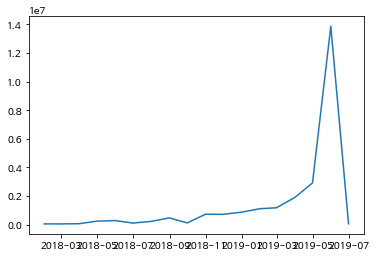

In [ ]:
cond1 = (df_['카테고리1'] == '한식(분식)')
cond2 = (df_['카테고리1'] == '중식')
cond3 = (df_['카테고리1'] == '주방용품/소모품')

df_1 = df_.loc[cond1].pivot_table(index='최종주문일_dt', values='마진', aggfunc='sum').reset_index() # '한식(분식)'
df_2 = df_.loc[cond2].pivot_table(index='최종주문일_dt', values='마진', aggfunc='sum').reset_index() # '중식'
df_3 = df_.loc[cond3].pivot_table(index='최종주문일_dt', values='마진', aggfunc='sum').reset_index()# '주방용품/소모품'
df_1['최종주문일_dt'] = pd.to_datetime(df_3['최종주문일_dt'])
df_2['최종주문일_dt'] = pd.to_datetime(df_3['최종주문일_dt'])
df_3['최종주문일_dt'] = pd.to_datetime(df_3['최종주문일_dt'])
p1 = df_1.set_index('최종주문일_dt')
p2 = df_2.set_index('최종주문일_dt')
p3 = df_3.set_index('최종주문일_dt')
# sns.lineplot(data=p3, x="최종주문일_dt", y="마진")

y = p3["마진"].resample("1M").sum()

plt.plot(y)

In [ ]:
p2.isnull().sum()

마진    0
dtype: int64

In [ ]:
#colab 글자깨짐

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from pylab import rcParams

rcParams["figure.figsize"]= 13,10 #그래프의 SIZE를 조정해주는 함수

# #차트 기본 크기 설정
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
# mpl.rcParams['text.color'] = 'k'

In [ ]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2018-01-02 to NaT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   마진      317 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [ ]:
p3.columns

Index(['마진'], dtype='object')

In [ ]:
# 시계열 시작

In [ ]:
cond1 = (df_['카테고리1'] == '한식(분식)')
cond2 = (df_['카테고리1'] == '중식')
cond3 = (df_['카테고리1'] == '주방용품/소모품')

df_1 = df_.loc[cond1].pivot_table(index='최종주문일_dt', values='수량', aggfunc='sum').reset_index() # '한식(분식)'
df_2 = df_.loc[cond2].pivot_table(index='최종주문일_dt', values='수량', aggfunc='sum').reset_index() # '중식'
df_3 = df_.loc[cond3].pivot_table(index='최종주문일_dt', values='수량', aggfunc='sum').reset_index()# '주방용품/소모품'
df_1['최종주문일_dt'] = pd.to_datetime(df_1['최종주문일_dt'])
df_2['최종주문일_dt'] = pd.to_datetime(df_2['최종주문일_dt'])
df_3['최종주문일_dt'] = pd.to_datetime(df_3['최종주문일_dt'])
p1 = df_1.set_index('최종주문일_dt')
p2 = df_2.set_index('최종주문일_dt')
p3 = df_3.set_index('최종주문일_dt')

# sns.lineplot(data=p3, x="최종주문일_dt", y="마진")

target = p2["수량"].resample("1D").sum()
target = target.fillna( method="ffill")

In [ ]:
target.isnull().sum() # 결측치 확인

0

In [ ]:
target

최종주문일_dt
2018-01-05    1.0
2018-01-06    0.0
2018-01-07    0.0
2018-01-08    0.0
2018-01-09    0.0
             ... 
2019-06-15    0.0
2019-06-16    0.0
2019-06-17    0.0
2019-06-18    0.0
2019-06-19    2.0
Freq: D, Name: 수량, Length: 531, dtype: float64

target = p3["판매가"].resample("1D").mean()
target = target.fillna( method="ffill")
target.isnull().sum()

In [ ]:
target.max()

809.0

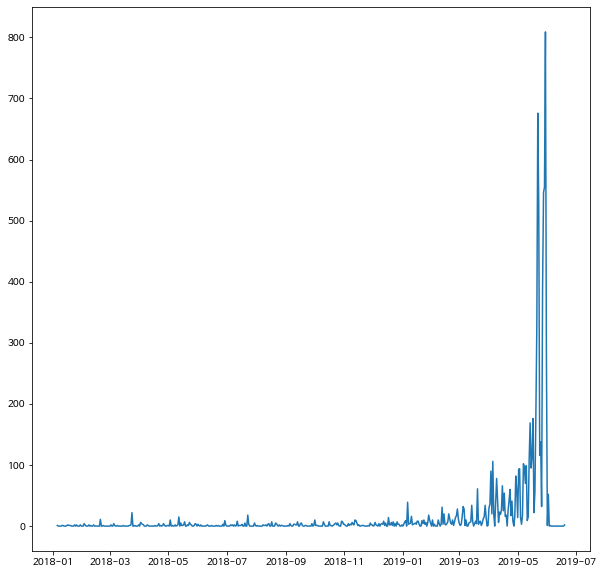

In [ ]:

plt.figure(figsize=(10, 10))
plt.plot(target)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
mpl.rc("font", family = "Malgun Gothic")

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [ ]:
model_series = tsa.seasonal_decompose(target, model="additive")
model_series

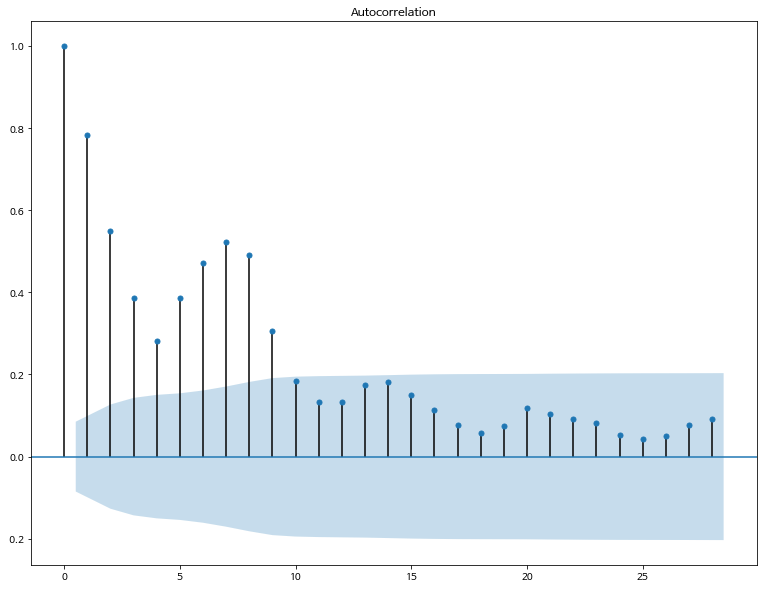

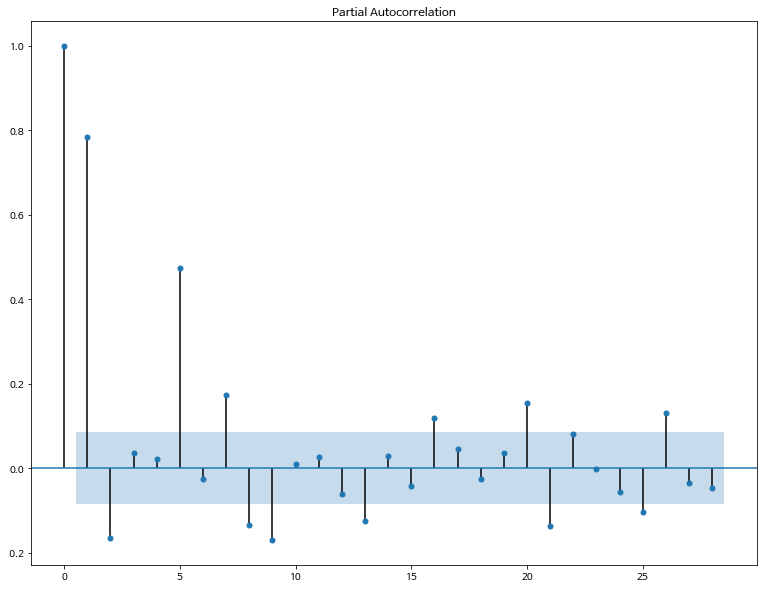

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(target)
plot_pacf(target)
plt.show()

참조 : https://byeongkijeong.github.io/ARIMA-with-Python/

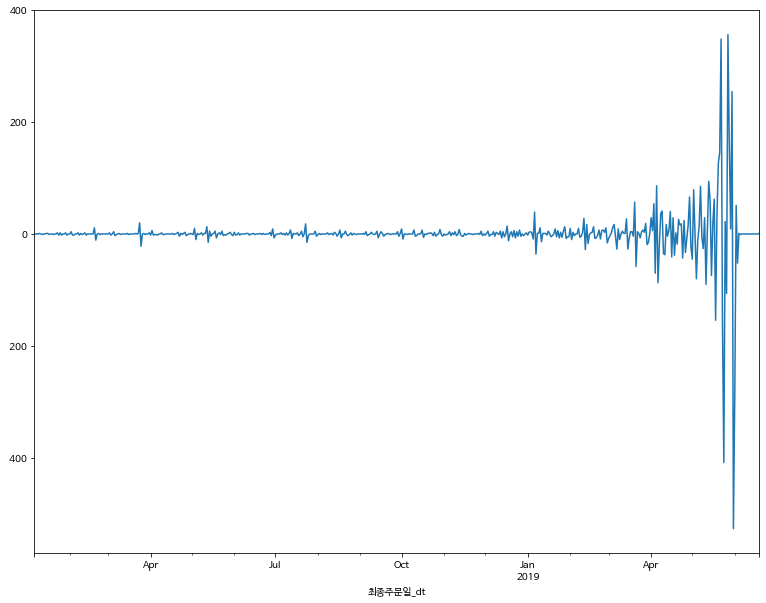

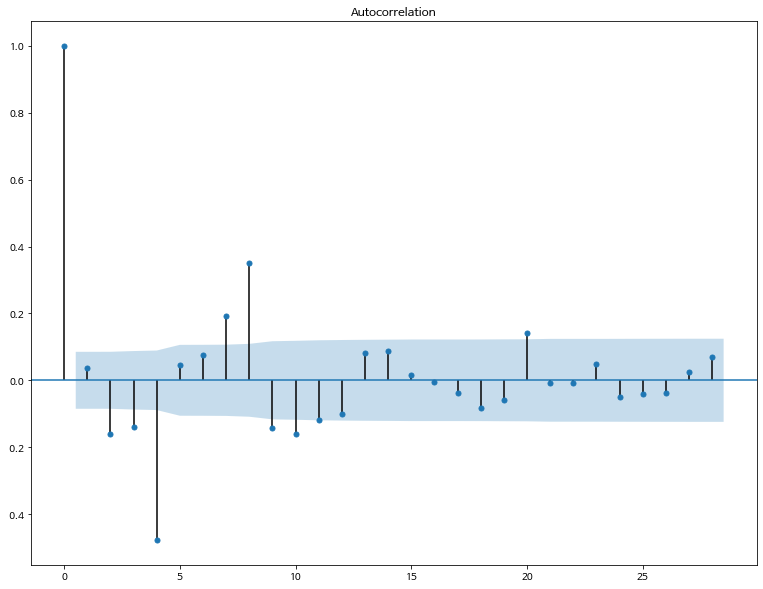

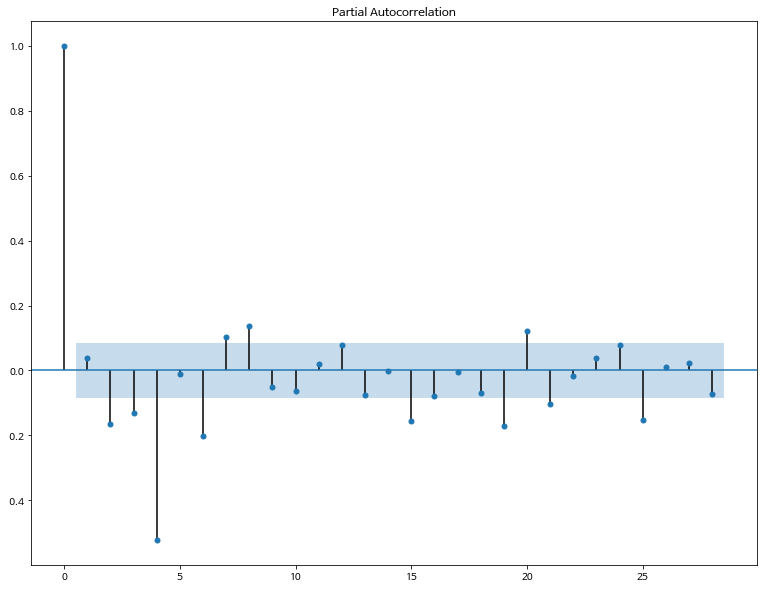

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=target.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(target, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.수량   No. Observations:                  530
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2771.929
Method:                       css-mle   S.D. of innovations             45.201
Date:                Fri, 21 Oct 2022   AIC                           5549.857
Time:                        00:07:13   BIC                           5562.676
Sample:                    01-06-2018   HQIC                          5554.875
                         - 06-19-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      2.070      0.001      0.999      -4.055       4.059
ma.L1.D.수량     0.0543      0.052      1.052      0.293      -0.047       0.155
                                    Roots           

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

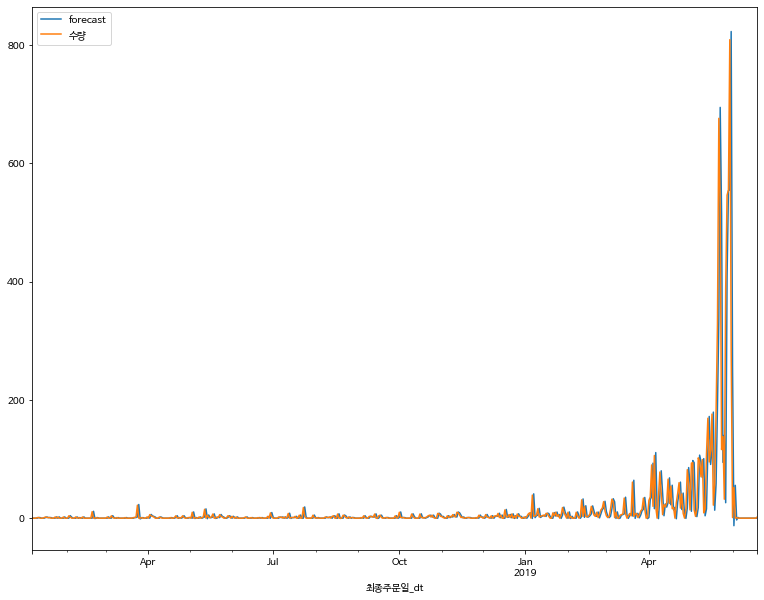

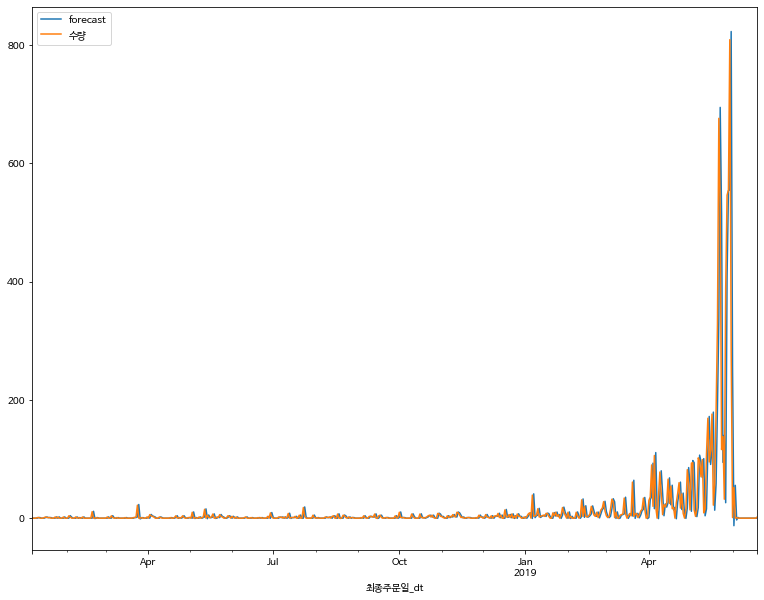

In [ ]:
# ‘P > z’ 값이 일반적으로 학습의 적정성을 위해 확인되는 t-test값이다.
# (‘P > z’) < 0.05. 정규성을 띄지 않는다.

model_fit.plot_predict()

In [ ]:
target

최종주문일_dt
2018-01-05    1.0
2018-01-06    0.0
2018-01-07    0.0
2018-01-08    0.0
2018-01-09    0.0
             ... 
2019-06-15    0.0
2019-06-16    0.0
2019-06-17    0.0
2019-06-18    0.0
2019-06-19    2.0
Freq: D, Name: 수량, Length: 531, dtype: float64

In [ ]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([2.11041379]), array([45.2007104]), array([[-86.48135067,  90.70217826]]))


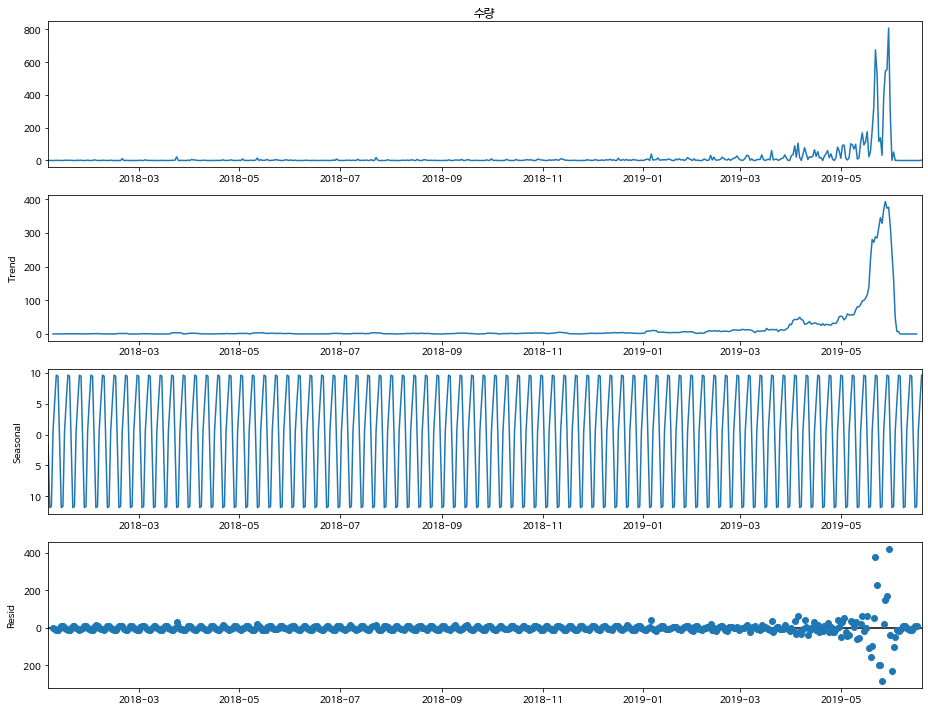

In [ ]:
fig = model_series.plot()
plt.show()

In [ ]:
import itertools # 반복수를 만드는 라이브러리 
p = d  = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2] , 12) for x in list(itertools.product(p, d, q))]

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(target, order=param,
                                        seasonal_order= param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue 

In [ ]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')
# ARIMA_list.to_excel('arima_model_list.xlsx')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",5269.629712
43,"(1, 0, 1)","(0, 1, 1, 12)",5270.152068
39,"(1, 0, 0)","(1, 1, 1, 12)",5291.085191
35,"(1, 0, 0)","(0, 1, 1, 12)",5292.601452
59,"(1, 1, 1)","(0, 1, 1, 12)",5304.266655
63,"(1, 1, 1)","(1, 1, 1, 12)",5304.347324
31,"(0, 1, 1)","(1, 1, 1, 12)",5328.848360
27,"(0, 1, 1)","(0, 1, 1, 12)",5331.438671
23,"(0, 1, 0)","(1, 1, 1, 12)",5337.482464
55,"(1, 1, 0)","(1, 1, 1, 12)",5339.035834


In [ ]:
mod = tsa.statespace.SARIMAX(target,order=(1, 0, 1),seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 수량   No. Observations:                  531
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -2629.815
Date:                            Fri, 21 Oct 2022   AIC                           5269.630
Time:                                    00:07:45   BIC                           5290.753
Sample:                                01-05-2018   HQIC                          5277.915
                                     - 06-19-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6915      0.009     78.913      0.000       0.674       0.709
ma.L1          0.2282      0.016   

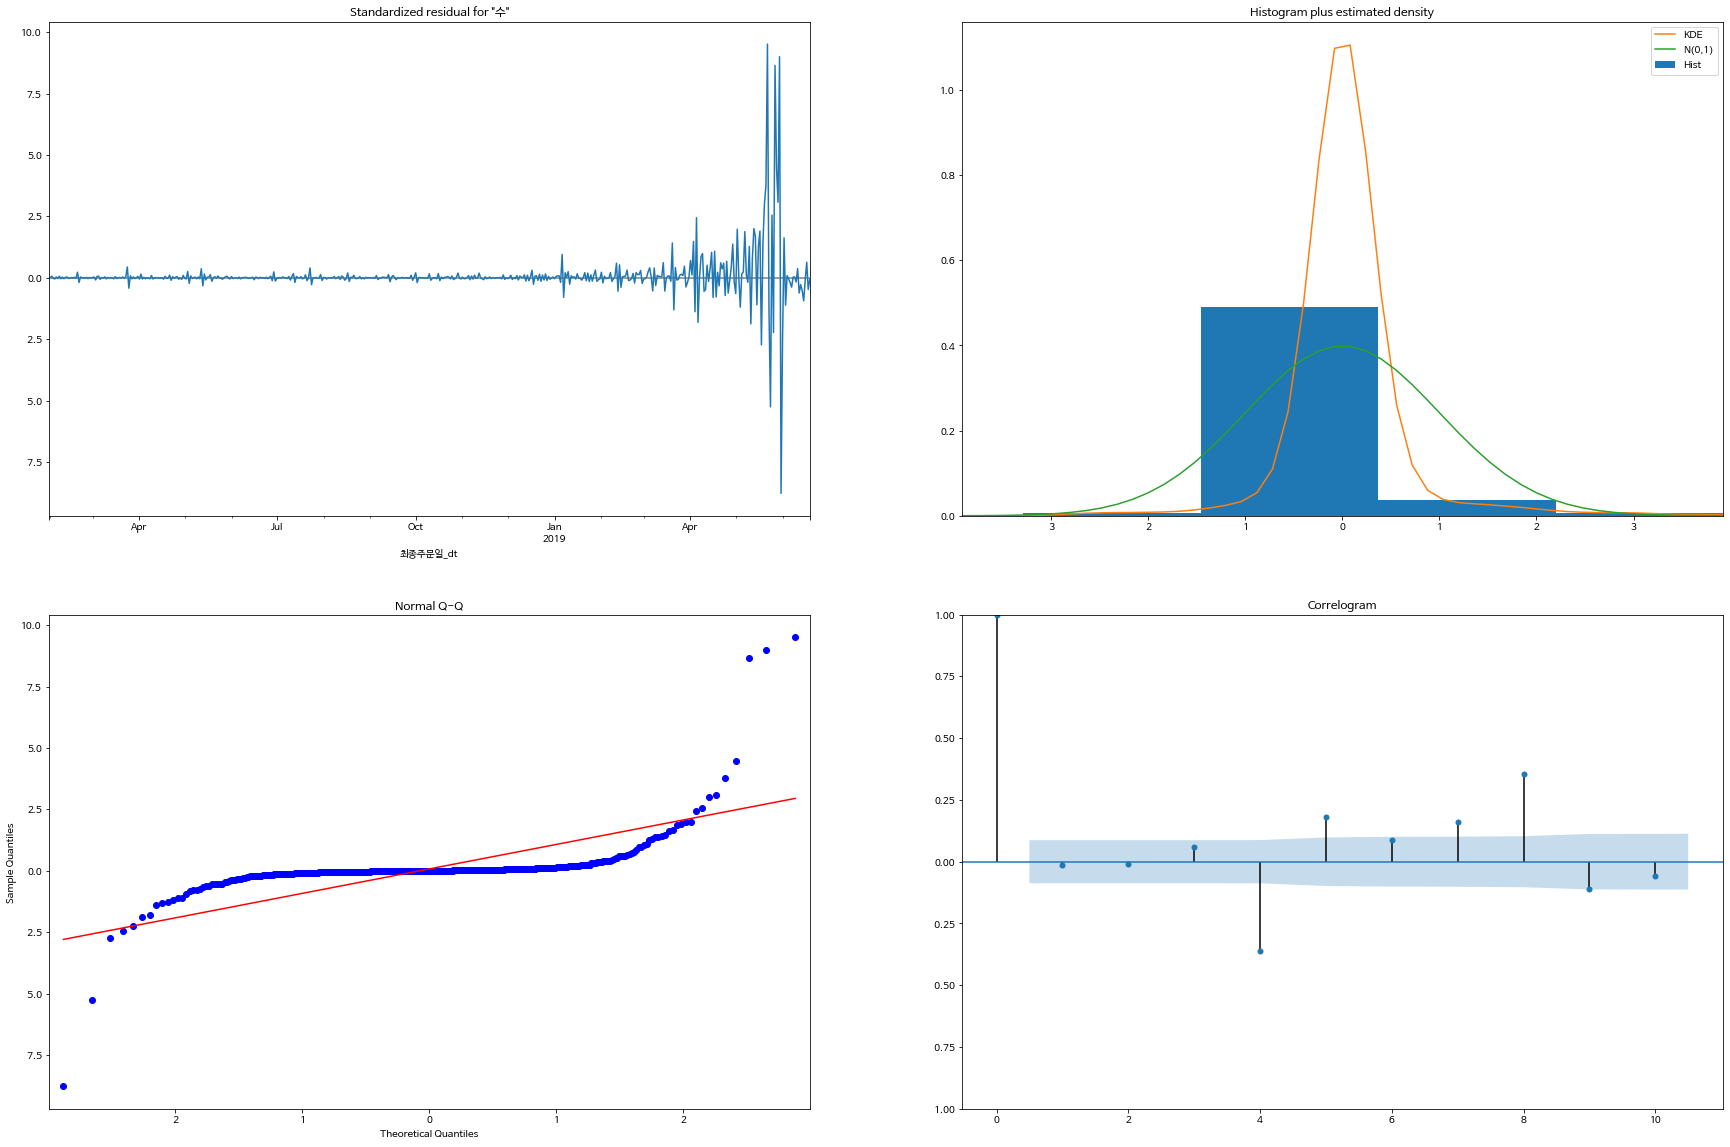

In [ ]:
results.plot_diagnostics(figsize=(30, 20))
plt.show()

In [ ]:
results.get_prediction()

In [ ]:
import statsmodels.api as sm

In [ ]:
mod = sm.tsa.statespace.SARIMAX(target,
                                 order=(0, 1, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 수량   No. Observations:                  531
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2662.719
Date:                            Fri, 21 Oct 2022   AIC                           5331.439
Time:                                    00:07:47   BIC                           5344.106
Sample:                                01-05-2018   HQIC                          5336.408
                                     - 06-19-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0514      0.010      4.966      0.000       0.031       0.072
ma.S.L12      -1.0347      0.034   